# Задача 8

Решить жесткую систему уравнений по явной и неявной схемам Эйлера.

$$\begin{cases}
   u'(t) = 998 \; u + 1998 \; v \\
   v'(t) = -999 \; u - 1999 \; v
 \end{cases}$$
 

## Решение 

In [53]:
import math
import matplotlib.pyplot as plt
import numpy as np
import time

Явная схема Эйлера: 

$$ u_{n+1} = u_{n} + h f_u(t_n, u_n, v_n)$$
$$ v_{n+1} = v_{n} + h f_v(t_n, u_n, v_n)$$

Неявная схема Эйера:

$$ u_{n+1} = u_{n} + h f_u(t_{n+1}, u_{n+1}, v_{n+1})$$
$$ v_{n+1} = v_{n} + h f_v(t_{n+1}, u_{n+1}, v_{n+1})$$

Правые части:

In [2]:
a = 998
b = 1998
c = -999
d = -1999

def f_u(t, u, v):
    return a*u + b*v

def f_v(t, u, v):
    return c*u + d*v

Начальные данные и интервал по $t$:

In [119]:
t_start = 0
t_end = 1

u_start = 0.00001
v_start = 1

N = 5000
h = (t_end - t_start)/N
h

0.0002

### Аналитическое решение 

$$u(t) = 2\alpha \cdot e^{-t} + \beta \cdot e^{-1000t}$$ 

$$v(t) = -\alpha \cdot e^{-t} - \beta \cdot e^{-1000t}$$ 

$\alpha$ и $\beta$ из начальных данных:

$$\alpha = (u(t_0) + v(t_0)) \cdot e^{t_0}$$

$$\beta = - (u(t_0) + 2v(t_0)) \cdot e^{1000 t_0}$$

In [95]:
def solution(t_start, t_end, u_start, v_start, N):
    
    alpha = (u_start + v_start) * math.exp(t_start)
    beta = -1*(u_start + 2*v_start) * math.exp(1000*t_start)
    #print(alpha, beta)
    
    t_s = []
    u_s = []
    v_s = []
    
    h = (t_end - t_start)/N
    
    t_s.append(t_start)
    u_s.append(u_start)
    v_s.append(v_start)
    
    for i in range(1, N+1):
        t_s.append(t_start + i*h)
        u_s.append(2*alpha*math.exp(-1*t_s[i]) + beta*math.exp(-1000*t_s[i]))
        v_s.append(-1*alpha*math.exp(-1*t_s[i]) - beta*math.exp(-1000*t_s[i]))
        
    return t_s, u_s, v_s

In [127]:
#N = 10000

t_sol, u_sol, v_sol = solution(t_start, t_end, u_start, v_start, N)

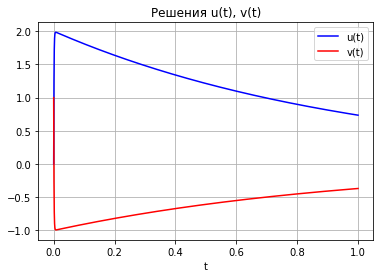

In [128]:
plt.plot(t_sol, u_sol, 'b', label="u(t)")
plt.plot(t_sol, v_sol, 'r', label="v(t)")
plt.grid()
plt.xlabel('t')
plt.title('Решения u(t), v(t)')
plt.legend()
plt.show()

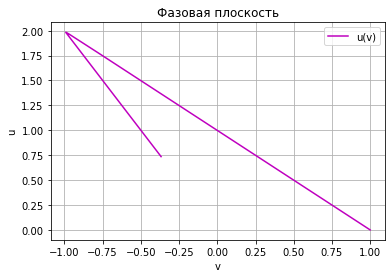

In [129]:
plt.plot(v_sol, u_sol, 'm', label="u(v)")
plt.grid()
plt.xlabel('v')
plt.ylabel('u')
plt.title('Фазовая плоскость')
plt.legend()
plt.show()

### Явная схема Эйлера

$$ u_{n+1} = u_{n} + h f_u(t_n, u_n, v_n)$$
$$ v_{n+1} = v_{n} + h f_v(t_n, u_n, v_n)$$

In [130]:
def euler_expl(f_1, f_2, t_start, t_end, u_start, v_start, N):
    
    tic = time.time()
    
    t_s = []
    u_s = []
    v_s = []
    
    h = (t_end - t_start)/N
    
    t_s.append(t_start)
    u_s.append(u_start)
    v_s.append(v_start)
    
    for i in range(1, N+1):
        t_s.append(t_start + i*h)
        u_s.append(u_s[i-1] + h*f_1(t=t_s[i-1], u=u_s[i-1], v=v_s[i-1]))
        v_s.append(v_s[i-1] + h*f_2(t=t_s[i-1], u=u_s[i-1], v=v_s[i-1]))
        
    toc = time.time()

    return t_s, u_s, v_s, (toc-tic)

In [131]:
#N = 10000

t_expl, u_expl, v_expl, time_expl = euler_expl(f_u, f_v, t_start, t_end, u_start, v_start, N)

Время:

In [132]:
time_expl

0.01709747314453125

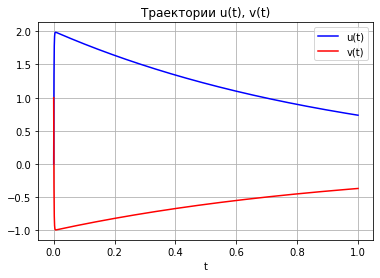

In [133]:
plt.plot(t_expl, u_expl, 'b', label="u(t)")
plt.plot(t_expl, v_expl, 'r', label="v(t)")
plt.grid()
plt.xlabel('t')
plt.title('Траектории u(t), v(t)')
plt.legend()
plt.show()

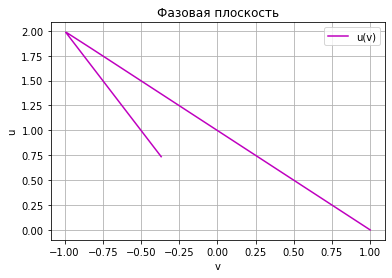

In [134]:
plt.plot(v_expl, u_expl, 'm', label="u(v)")
plt.grid()
plt.xlabel('v')
plt.ylabel('u')
plt.title('Фазовая плоскость')
plt.legend()
plt.show()

Вычислю ошибки в каждой точке для $u(t)$ и $v(t)$ как модули разностей аналитического решения в точке и решения явной схемой Эйлера.

In [135]:
err_v_expl = [abs(v_expl[i] - v_sol[i]) for i in range(len(v_expl))]
err_u_expl = [abs(u_expl[i] - u_sol[i]) for i in range(len(u_expl))]

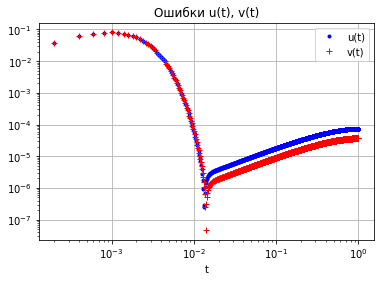

In [136]:
plt.plot(t_expl, err_u_expl, 'b.', label="u(t)")
plt.plot(t_expl, err_v_expl, 'r+', label="v(t)")
plt.grid()
plt.xlabel('t')
plt.title('Ошибки u(t), v(t)')
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.show()

### Неявная схема Эйлера

$$ u_{n+1} = u_{n} + h f_u(t_{n+1}, u_{n+1}, v_{n+1})$$
$$ v_{n+1} = v_{n} + h f_v(t_{n+1}, u_{n+1}, v_{n+1})$$

Для решения этой системы, подставлю явный вид $f_u$ и $f_v$ - линейные функции. 

$$\begin{cases}
   u_{n+1} = u_{n} + h(a \; u_{n+1} + b \; v_{n+1}) \\
   v_{n+1} = v_{n} + h(c \; u_{n+1} + d \; v_{n+1})
 \end{cases}$$
 
 И перепишу в матричном виде:
 
 $$\begin{pmatrix}
1 - h a & -h b\\
-h c & 1 - h d
\end{pmatrix}
\begin{pmatrix}
u_{n+1}\\
v_{n+1}
\end{pmatrix} = 
\begin{pmatrix}
u_{n}\\
v_{n}
\end{pmatrix}
$$

Тогда решение сведется к решению СЛАУ

In [106]:
import scipy.linalg as sla

In [107]:
def euler_impl(f_1, f_2, t_start, t_end, u_start, v_start, N):
    
    tic = time.time()
    
    t_s = []
    u_s = []
    v_s = []
    
    h = (t_end - t_start)/N
    
    A = np.array([[1 - h*a, -1*h*b],[-1*h*c, 1 - h*d]])
    
    t_s.append(t_start)
    u_s.append(u_start)
    v_s.append(v_start)
    
    prev = np.array([u_start, v_start])
    
    for i in range(1, N+1):
        t_s.append(t_start + i*h)
        #cur = sla.solve(A, prev)
        cur = sla.inv(A).dot(prev)
        
        prev = cur
        
        u_s.append(cur[0])
        v_s.append(cur[1])
        
    toc = time.time()
    
    return t_s, u_s, v_s, (toc - tic)

In [137]:
#N = 10000

t_impl, u_impl, v_impl, time_impl = euler_impl(f_u, f_v, t_start, t_end, u_start, v_start, N)

Время:

In [138]:
time_impl

0.6858730316162109

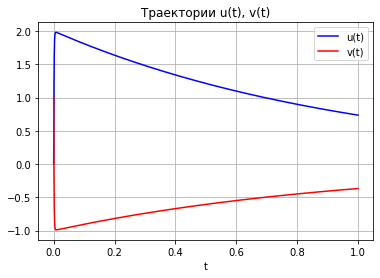

In [139]:
plt.plot(t_impl, u_impl, 'b', label="u(t)")
plt.plot(t_impl, v_impl, 'r', label="v(t)")
plt.grid()
plt.xlabel('t')
plt.title('Траектории u(t), v(t)')
plt.legend()
plt.show()

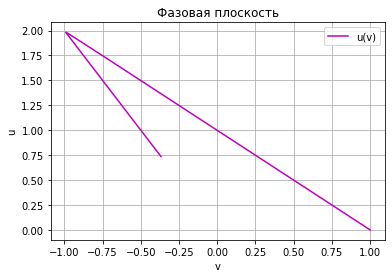

In [140]:
plt.plot(v_impl, u_impl, 'm', label="u(v)")
plt.grid()
plt.xlabel('v')
plt.ylabel('u')
plt.title('Фазовая плоскость')
plt.legend()
plt.show()

Вычислю ошибки в каждой точке для $u(t)$ и $v(t)$ как модули разностей аналитического решения в точке и решения неявной схемой Эйлера.

In [141]:
err_v_impl = [abs(v_impl[i] - v_sol[i]) for i in range(len(v_impl))]
err_u_impl = [abs(u_impl[i] - u_sol[i]) for i in range(len(u_impl))]

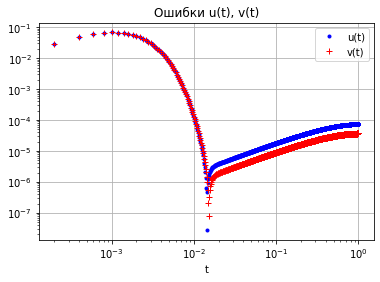

In [142]:
plt.plot(t_impl, err_u_impl, 'b.', label="u(t)")
plt.plot(t_impl, err_v_impl, 'r+', label="v(t)")
plt.grid()
plt.xlabel('t')
plt.title('Ошибки u(t), v(t)')
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.show()

**Сравнение ошибок для двух методов:**

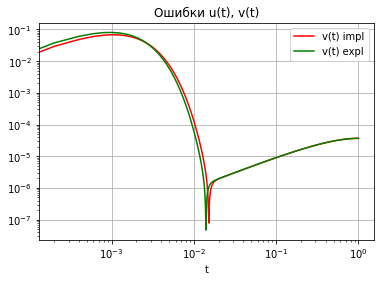

In [143]:
#plt.plot(t_impl, err_u_impl, 'b.', label="u(t) impl")
plt.plot(t_impl, err_v_impl, 'r', label="v(t) impl")
#plt.plot(t_expl, err_u_expl, 'm.', label="u(t) expl")
plt.plot(t_expl, err_v_expl, 'g', label="v(t) expl")
plt.grid()
plt.xlabel('t')
plt.title('Ошибки u(t), v(t)')
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.show()

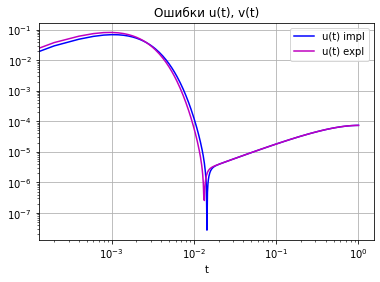

In [144]:
plt.plot(t_impl, err_u_impl, 'b', label="u(t) impl")
#plt.plot(t_impl, err_v_impl, 'r+', label="v(t) impl")
plt.plot(t_expl, err_u_expl, 'm', label="u(t) expl")
#plt.plot(t_expl, err_v_expl, 'g+', label="v(t) expl")
plt.grid()
plt.xlabel('t')
plt.title('Ошибки u(t), v(t)')
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.show()

**Время:**

In [116]:
print("Явный: ", time_expl)
print("Неявный: ", time_impl)

Явный:  0.001352071762084961
Неявный:  0.04649472236633301
